In [1]:
import multipers as mp
import numpy as np
from multipers.data import three_annulus
from multipers.filtrations import CoreDelaunay
from multipers.filtrations.density import KDE
import multipers.slicer as mps
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from time import time
from pathlib import Path

[KeOps] Warning : CUDA libraries not found or could not be loaded; Switching to CPU only.


In [17]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 28}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (10, 10)

def plot_hilbert_function(st, degree, show_colorbar=True, show_y_axis=False, y_axis_label="k", x_axis_label="r", show_title=False, adjust_y_axis=True):
    print(f"Computing the Hilbert function for degree {degree}...")
    t_start = time()
    sm, = mp.signed_measure(st, degree=degree, invariant="hilbert")
    _ = mp.point_measure.integrate_measure(*sm, plot=True)
    t_end = time()
    print(f"Computing the Hilbert function took {t_end - t_start:.4f} seconds.")
    ax = plt.gca()
    if show_title:
        ax.set_title(f"$H_{degree}$")
    else:
        ax.set_title("")
    ax.set_xlabel(x_axis_label)
    ax.set_ylabel(y_axis_label)

    if adjust_y_axis:
        ax.set_ylim(ax.get_ylim()[0], 1)
    ax.set_xlim(0, ax.get_xlim()[1])

    ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune="both"))
    ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune=None))

    if not show_colorbar:
        fig = plt.gca().figure
        cbar_ax = fig.axes[1]
        fig.delaxes(cbar_ax)
        fig.subplots_adjust()

    if not show_y_axis:
        ax.set_yticks([])
        ax.set_ylabel("")
    

def plot_module_approximation(pers, degree, show_y_axis=True, min_persistence=0.01, y_axis_label="k", x_axis_label="r", show_title=False, adjust_y_axis=True):
    box = mp.grids.compute_bounding_box(pers)
    pers.plot(degree=degree, xlabel=x_axis_label, ylabel=y_axis_label, min_persistence=min_persistence, box=box, shapely=True)

    ax = plt.gca()

    if show_title:
        ax.set_title(f"$H_{degree}$")
    else:
        ax.set_title("")
    
    ax.set_xlabel(x_axis_label)
    ax.set_ylabel(y_axis_label)

    if adjust_y_axis:
        ax.set_ylim(ax.get_ylim()[0], 1)
    ax.set_xlim(0, ax.get_xlim()[1])

    ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune="both"))
    ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune=None))

    if not show_y_axis:
        ax.set_yticks([])
        ax.set_ylabel("")


def delaunay_core_persistence(points, beta, ks):
    print(f"Constructing the Delaunay Core bifiltration on {len(points)} points in R^{points.shape[1]}...")
    print(f"Using beta = {beta} and {len(ks)} values of k (from {ks[0]} to {ks[-1]})...")
    t_start = time()
    st = CoreDelaunay(points=points, beta=beta, ks=ks)
    t_end = time()
    print(f"Constructing the bifiltration took {t_end - t_start:.4f} seconds.")
    print(f"Computing the module approximation...")
    t_start = time()
    pers = mp.module_approximation(st, ignore_warnings=True)
    t_end = time()
    print(f"Computing the module approximation took {t_end - t_start:.4f} seconds.")
    return st, pers


def savefig(name, set_aspect=False):
    name = Path("figs/" + name)
    ax = plt.gca()
    if set_aspect:
        ax.set_aspect('equal', adjustable='box')
    if not ax.get_title():  
        ax.set_title(" ")
    if not ax.get_xlabel():
        ax.set_xlabel(" ")

    for axis in plt.gcf().get_axes():
        axis.tick_params(axis='x', pad=12)
        axis.tick_params(axis='y', pad=12)

    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight")
    print(f"Saved figure to {name}.")
    plt.show()
    plt.clf()


In [ ]:
np.random.seed(0)
X1 = three_annulus(1000, 1000)
X2 = np.load("data/clusterable_data.npy")
X3 = np.random.uniform(-1, 1, (1000, 2))
np.random.seed(0)
X4 = three_annulus(10000, 10000)


# Uncomment to use small point clouds for testing
# 
#np.random.seed(0)
#X1 = three_annulus(200, 200)
#X2 = np.load("data/clusterable_data.npy")
#X3 = np.random.uniform(-1, 1, (400, 2))
#np.random.seed(0)
#X4 = three_annulus(200, 200)


# Delaunay Core Bifiltration

The following code cells generate the plots for the Delaunay core bifiltration example in the paper. The `multipers` library is required.

## Uniform Noise

Saved figure to figs/delaunay_core_uniform_noise.eps.


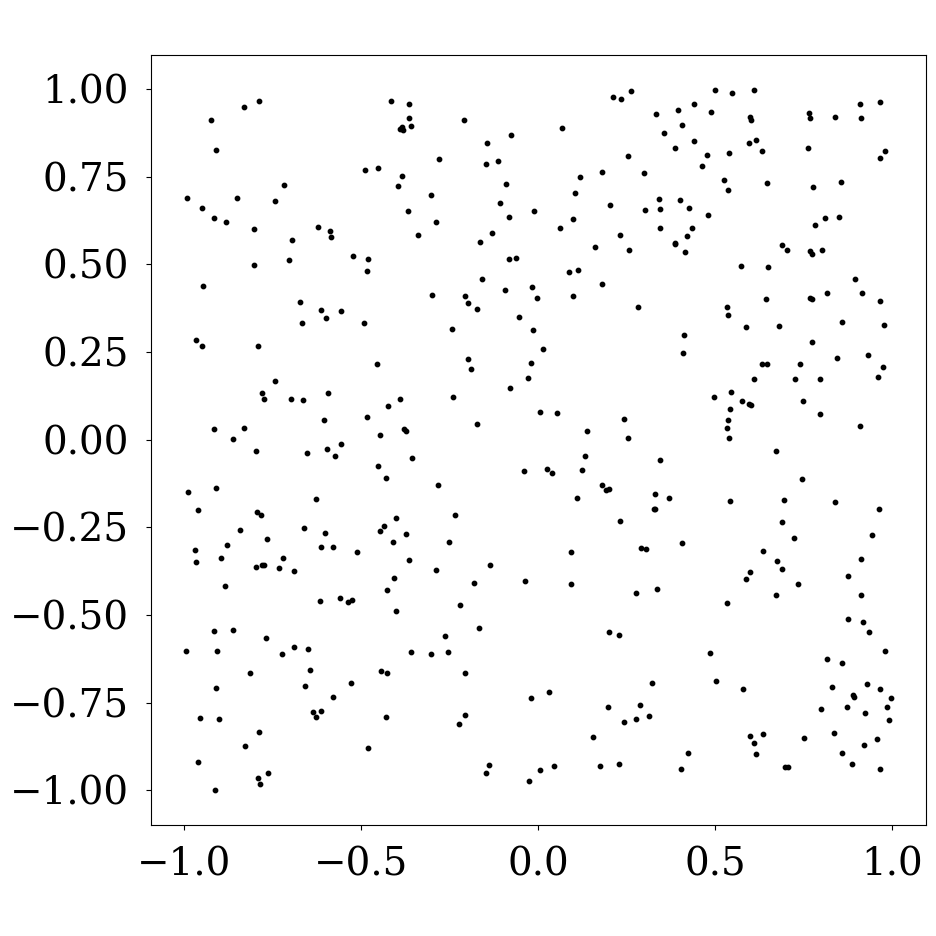

<Figure size 1000x1000 with 0 Axes>

In [20]:
plt.scatter(*X3.T, s=10, c="black")
savefig("delaunay_core_uniform_noise.eps")

Constructing the Delaunay Core bifiltration on 400 points in R^2...
Using beta = 1 and 200 values of k (from 1 to 200)...
Constructing the bifiltration took 0.4627 seconds.
Computing the module approximation...
Computing the module approximation took 6.8051 seconds.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved figure to figs/delaunay_core_uniform_noise_h0_module_approximation.eps.


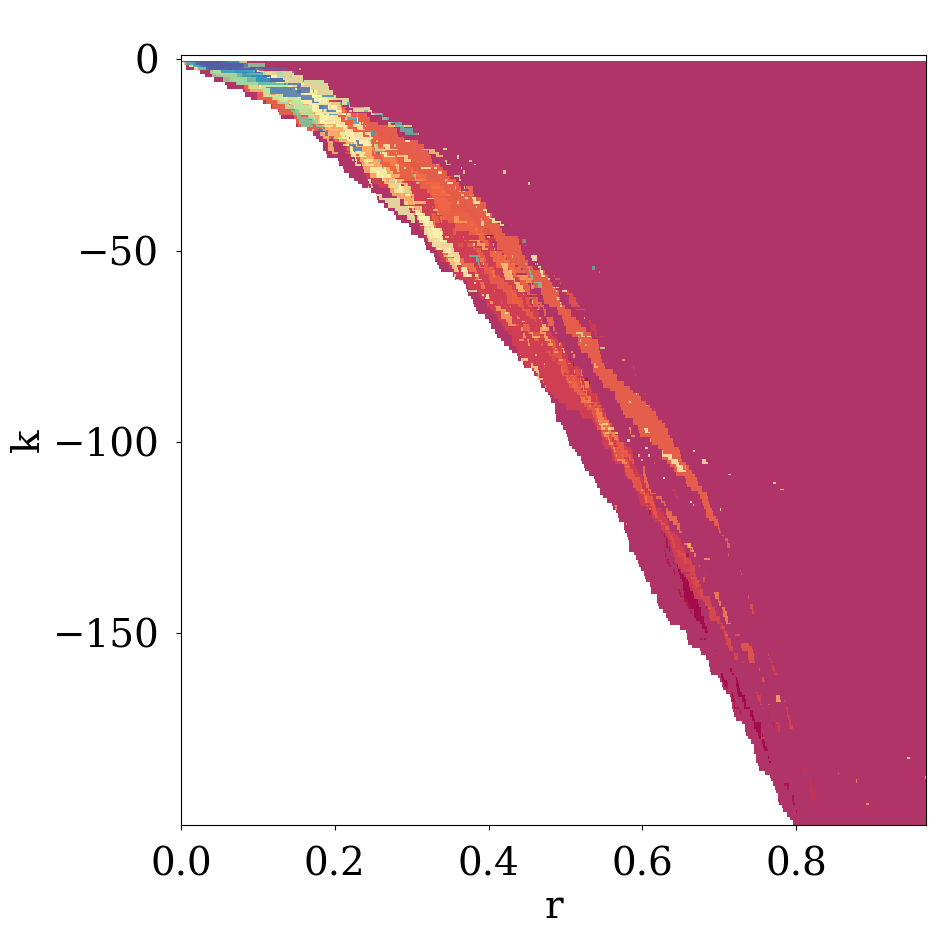

Computing the Hilbert function for degree 0...
Computing the Hilbert function took 2.0449 seconds.
Saved figure to figs/delaunay_core_uniform_noise_h0_hilbert_function.eps.


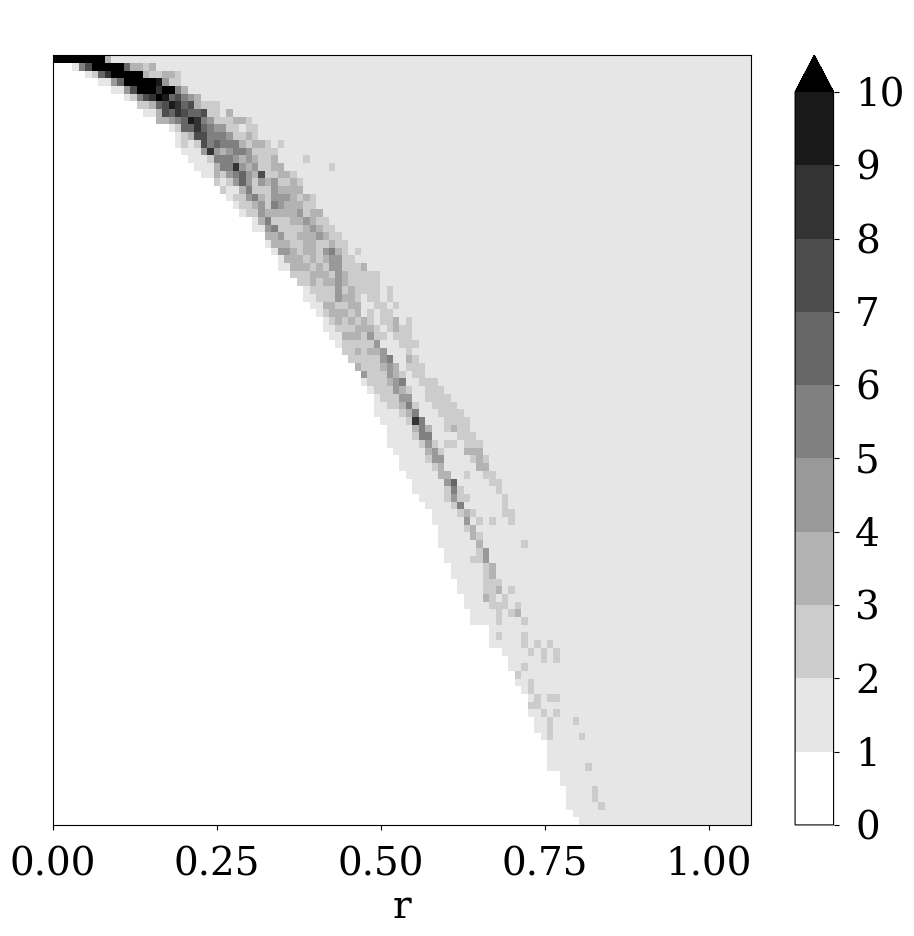

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved figure to figs/delaunay_core_uniform_noise_h1_module_approximation.eps.


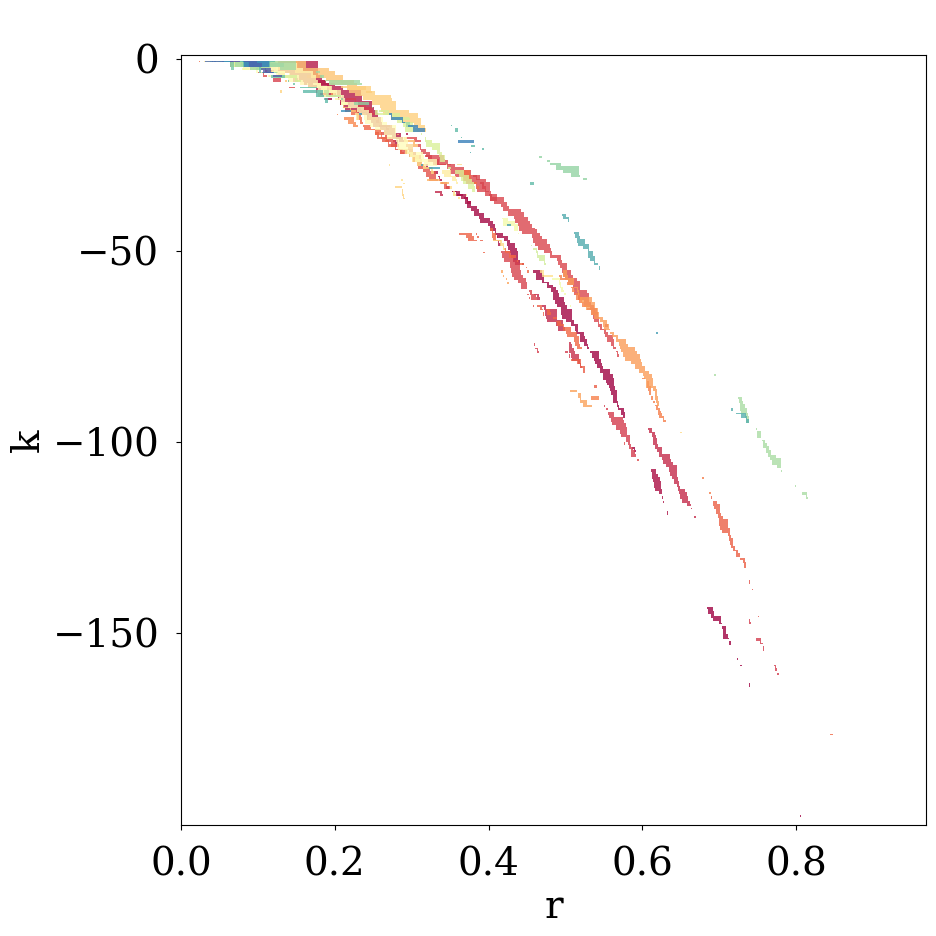

Computing the Hilbert function for degree 1...
Computing the Hilbert function took 2.0956 seconds.
Saved figure to figs/delaunay_core_uniform_noise_h1_hilbert_function.eps.


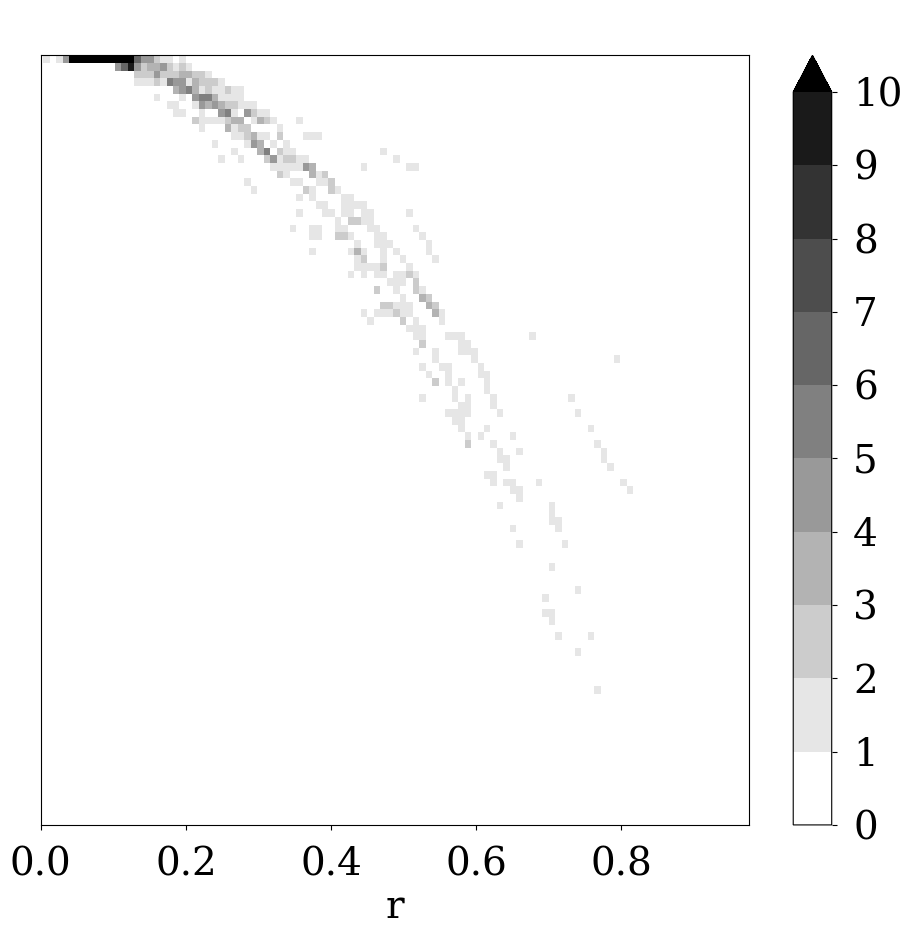

<Figure size 1000x1000 with 0 Axes>

In [21]:
k_max = 200
k_step = 1
ks = np.arange(1, k_max + 1, k_step)
beta = 1

st, pers = delaunay_core_persistence(points=X3, beta=beta, ks=ks)

for degree in [0, 1]:
    plot_module_approximation(pers, degree)
    savefig(f"delaunay_core_uniform_noise_h{degree}_module_approximation.eps")
    plot_hilbert_function(st, degree)
    savefig(f"delaunay_core_uniform_noise_h{degree}_hilbert_function.eps")



## Three Annulus Dataset

Saved figure to figs/delaunay_core_three_annulus.eps.


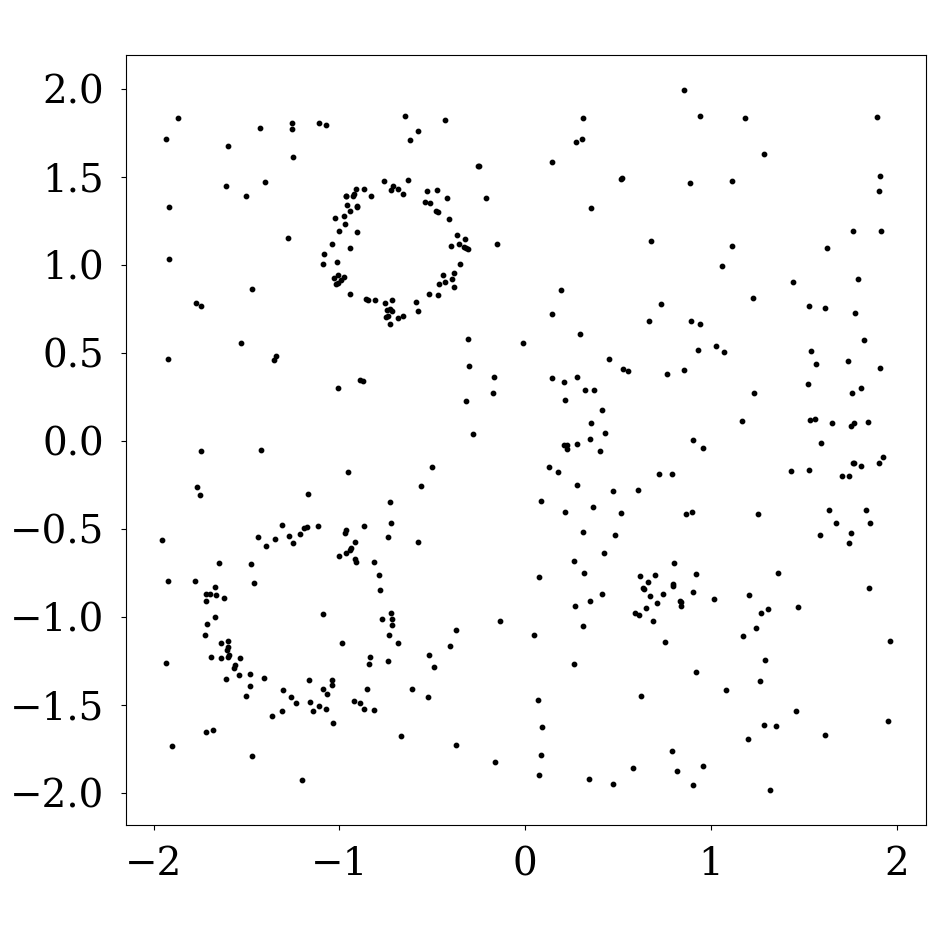

<Figure size 1000x1000 with 0 Axes>

In [7]:
plt.scatter(*X1.T, s=10, c="black")
savefig("delaunay_core_three_annulus.eps")

Constructing the Delaunay Core bifiltration on 400 points in R^2...
Using beta = 1 and 200 values of k (from 1 to 200)...
Constructing the bifiltration took 0.7750 seconds.
Computing the module approximation...
Computing the module approximation took 10.3780 seconds.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved figure to figs/delaunay_core_three_annulus_h1_module_approximation.eps.


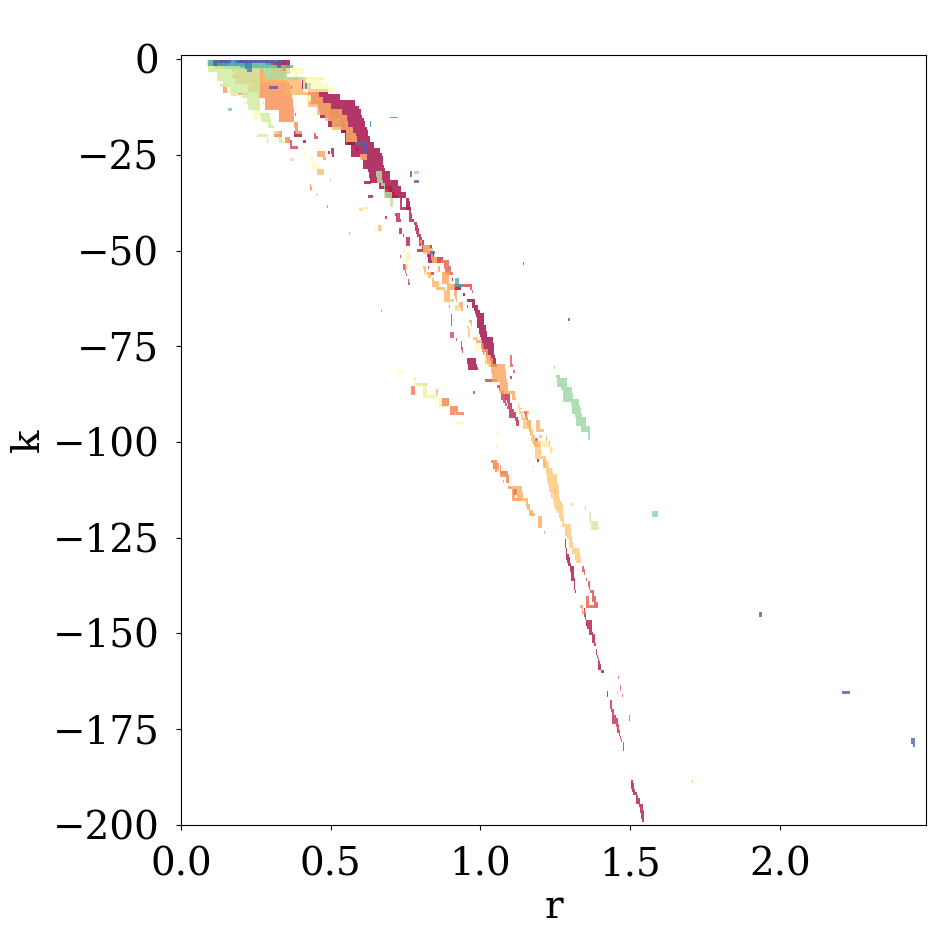

Computing the Hilbert function for degree 1...
Computing the Hilbert function took 2.2518 seconds.
Saved figure to figs/delaunay_core_three_annulus_h1_hilbert_function.eps.


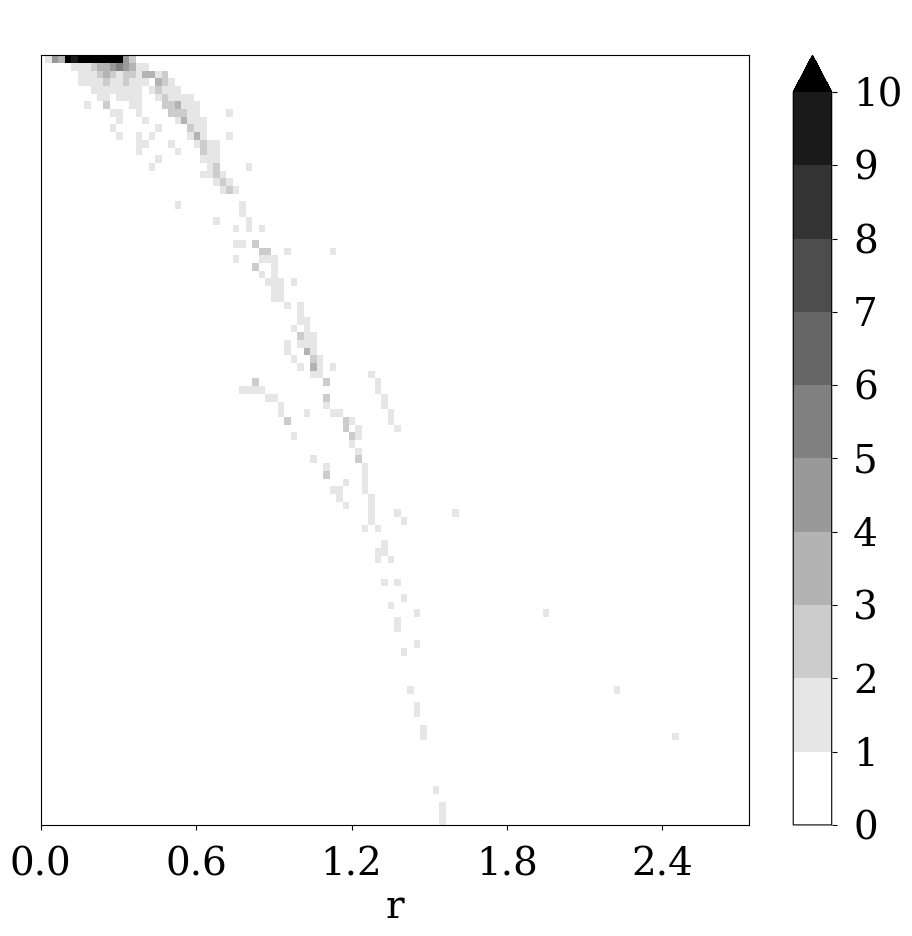

<Figure size 1000x1000 with 0 Axes>

In [8]:
k_max = 200
k_step = 1
ks = np.arange(1, k_max + 1, k_step)
beta = 1

st, pers = delaunay_core_persistence(points=X1, beta=beta, ks=ks)

for degree in [1]:
    plot_module_approximation(pers, degree)
    savefig(f"delaunay_core_three_annulus_h{degree}_module_approximation.eps")
    plot_hilbert_function(st, degree)
    savefig(f"delaunay_core_three_annulus_h{degree}_hilbert_function.eps")



## Clusterable Dataset

Saved figure to figs/delaunay_core_clusterdata.eps.


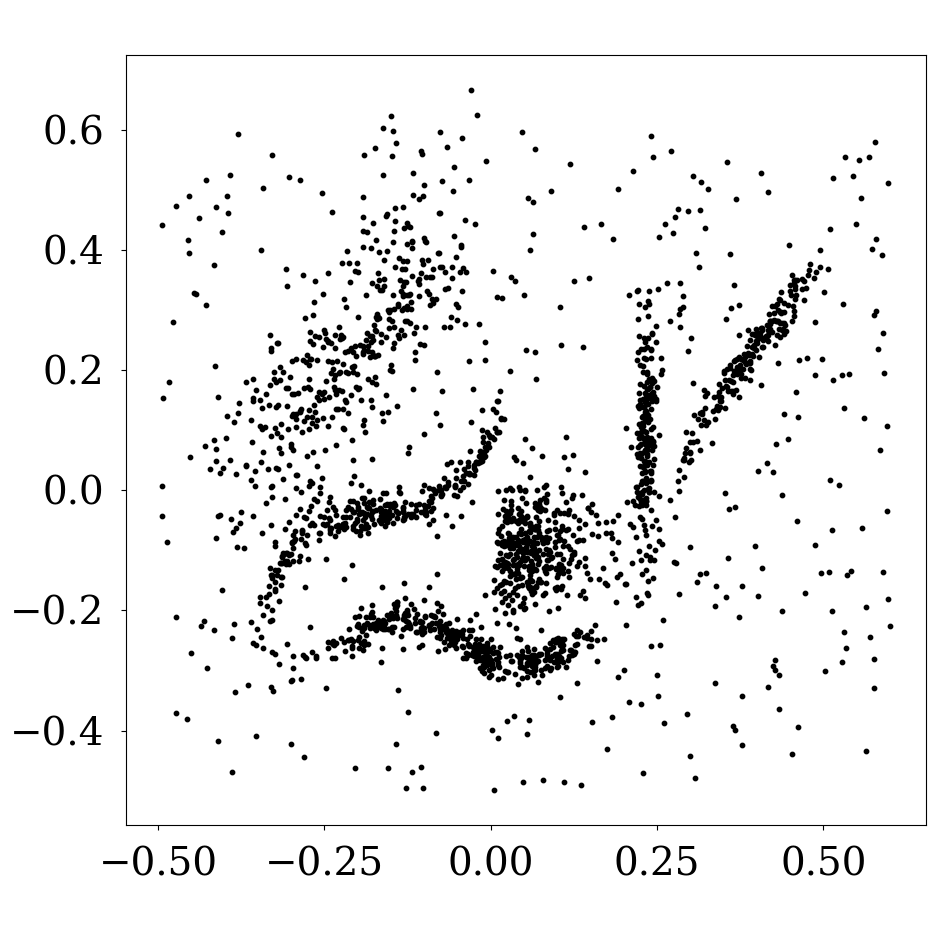

<Figure size 1000x1000 with 0 Axes>

In [9]:
plt.scatter(*X2.T, s=10, c="black")
savefig("delaunay_core_clusterdata.eps")

Constructing the Delaunay Core bifiltration on 2309 points in R^2...
Using beta = 1 and 200 values of k (from 1 to 200)...
Constructing the bifiltration took 3.5124 seconds.
Computing the module approximation...
Computing the module approximation took 51.6674 seconds.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved figure to figs/delaunay_core_clusterdata_h0_module_approximation.eps.


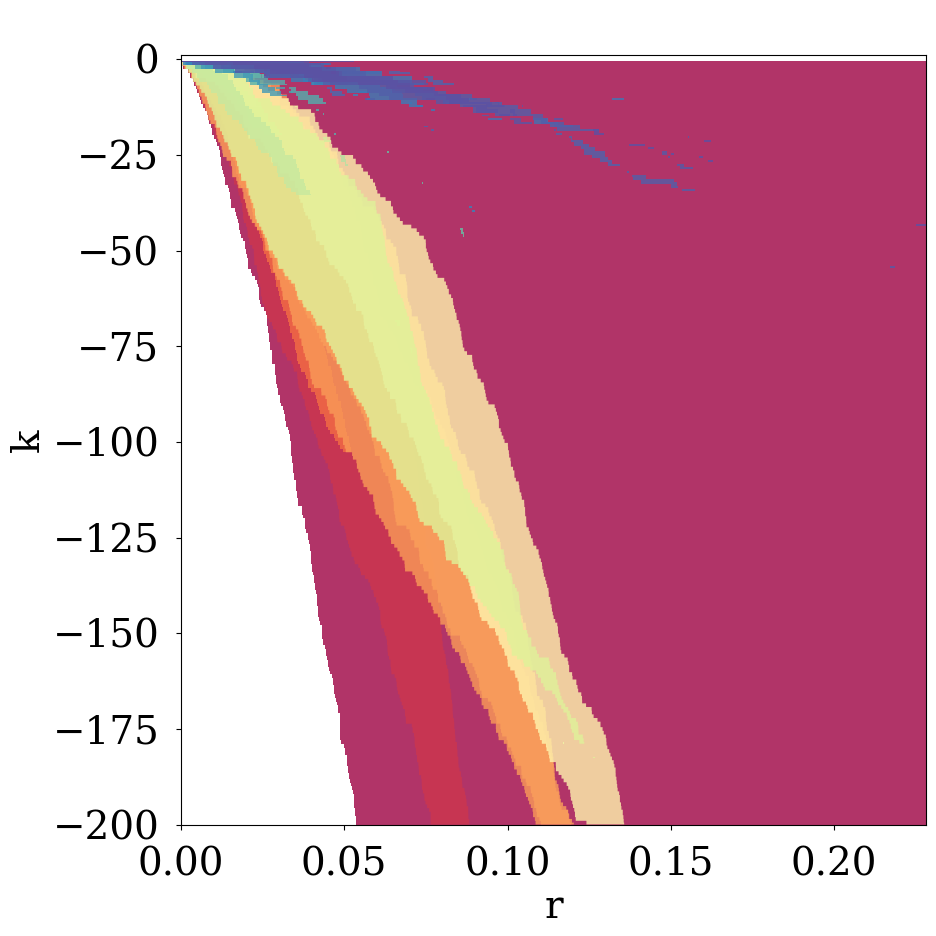

Computing the Hilbert function for degree 0...
Computing the Hilbert function took 12.4196 seconds.
Saved figure to figs/delaunay_core_clusterdata_h0_hilbert_function.eps.


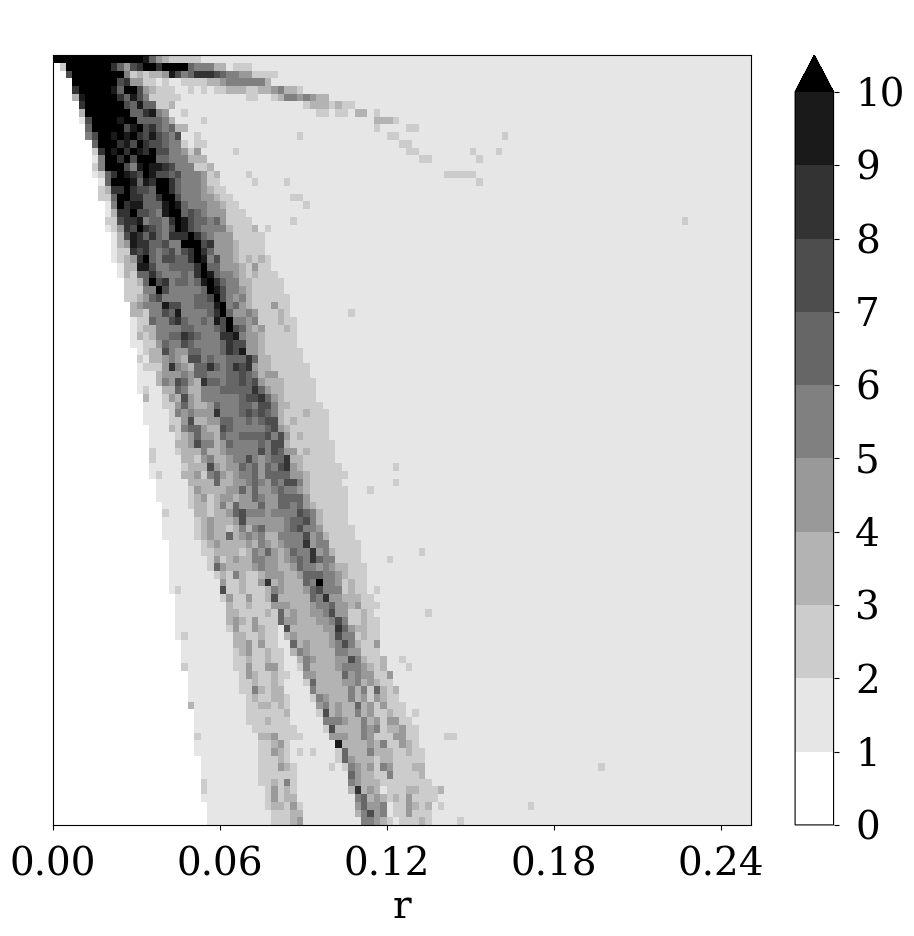

<Figure size 1000x1000 with 0 Axes>

In [10]:
k_max = 200
k_step = 1
ks = np.arange(1, k_max + 1, k_step)
beta = 1

st, pers = delaunay_core_persistence(points=X2, beta=beta, ks=ks)

for degree in [0]:
    plot_module_approximation(pers, degree)
    savefig(f"delaunay_core_clusterdata_h{degree}_module_approximation.eps")
    plot_hilbert_function(st, degree)
    savefig(f"delaunay_core_clusterdata_h{degree}_hilbert_function.eps")


# Function Delaunay Bifiltration (with codensity function)

The following code cells generate the plots for the function Delaunay Bifiltration (with codensity function). Both `function_delaunay` and `mpfree` are required in addition to `multipers`.

## Uniform Noise

Saved figure to figs/function_delaunay_uniform_noise_codensity.eps.


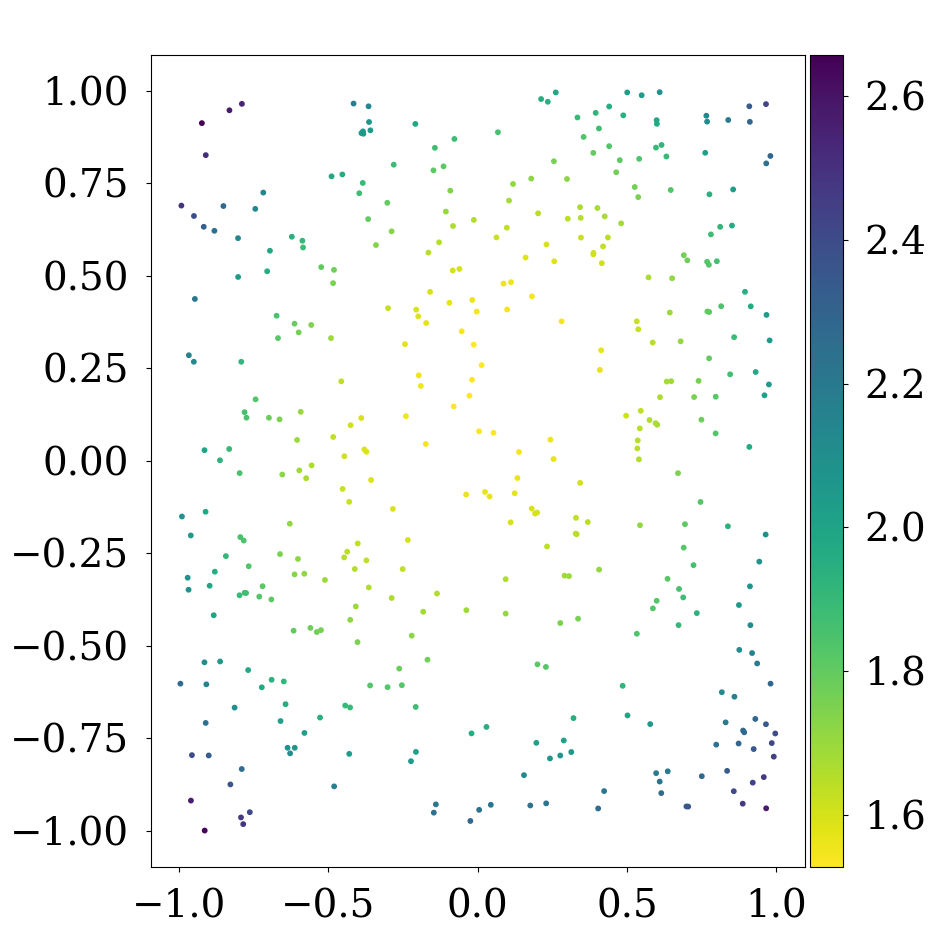

<Figure size 1000x1000 with 0 Axes>

In [11]:
density = KDE(bandwidth=0.5, return_log=True).fit(X3).score_samples(X3)
sc = plt.scatter(*X3.T, c = -density, cmap="viridis_r", s=10)
divider = make_axes_locatable(sc.axes)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(sc, cax=cax)
savefig("function_delaunay_uniform_noise_codensity.eps")

Constructing the function Delaunay bifiltration took 0.0535 seconds.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved figure to figs/function_delaunay_uniform_noise_codensity_h0_persistence.eps.


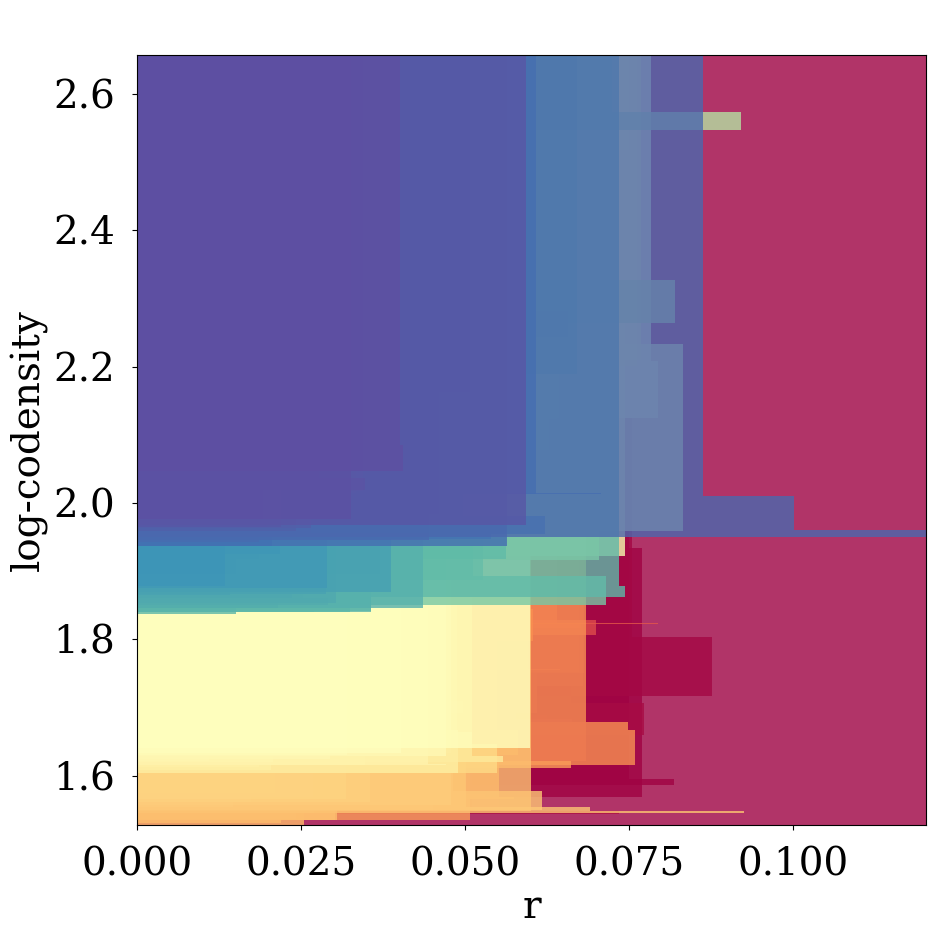

Computing the Hilbert function for degree 0...
Computing the Hilbert function took 0.0694 seconds.
Saved figure to figs/function_delaunay_uniform_noise_codensity_h0_hilbert_function.eps.


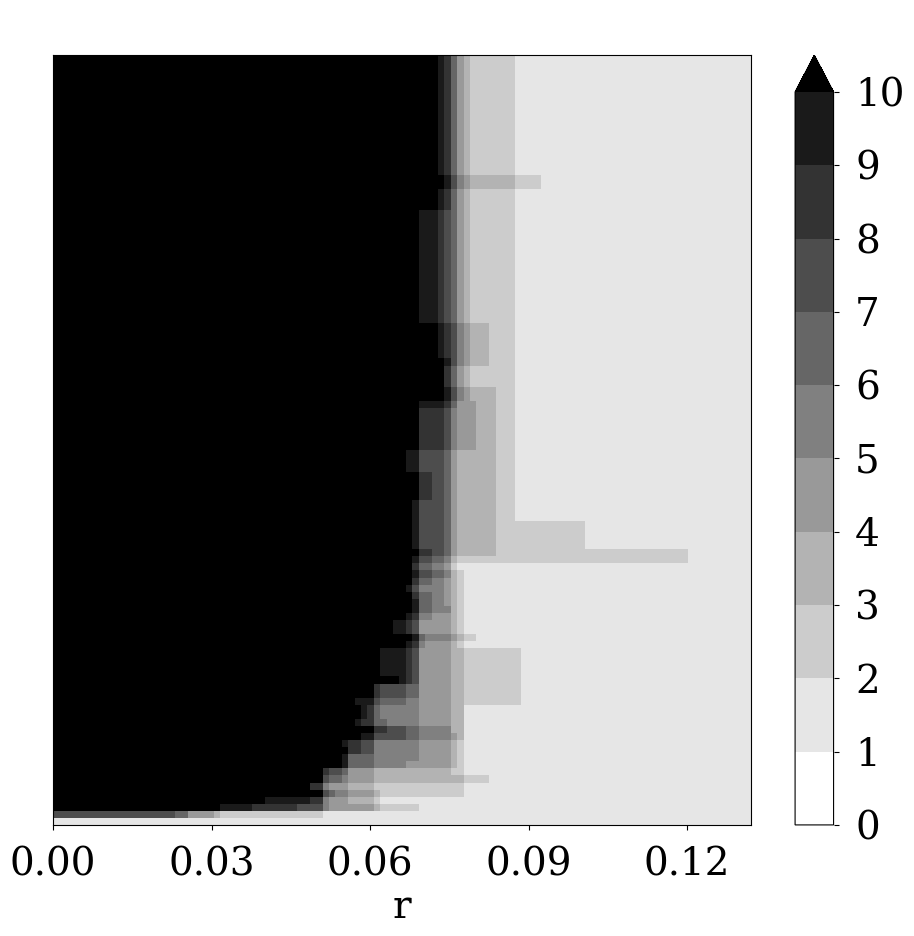

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved figure to figs/function_delaunay_uniform_noise_codensity_h1_persistence.eps.


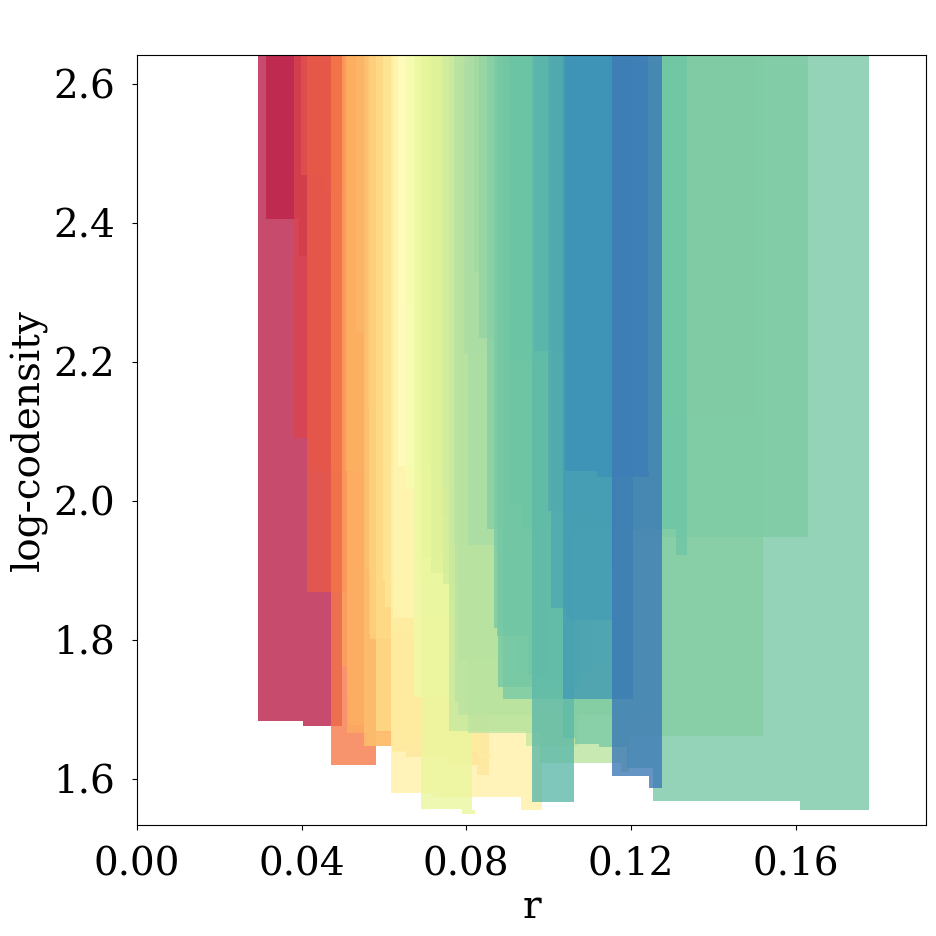

Computing the Hilbert function for degree 1...
Computing the Hilbert function took 0.0943 seconds.
Saved figure to figs/function_delaunay_uniform_noise_codensity_h1_hilbert_function.eps.


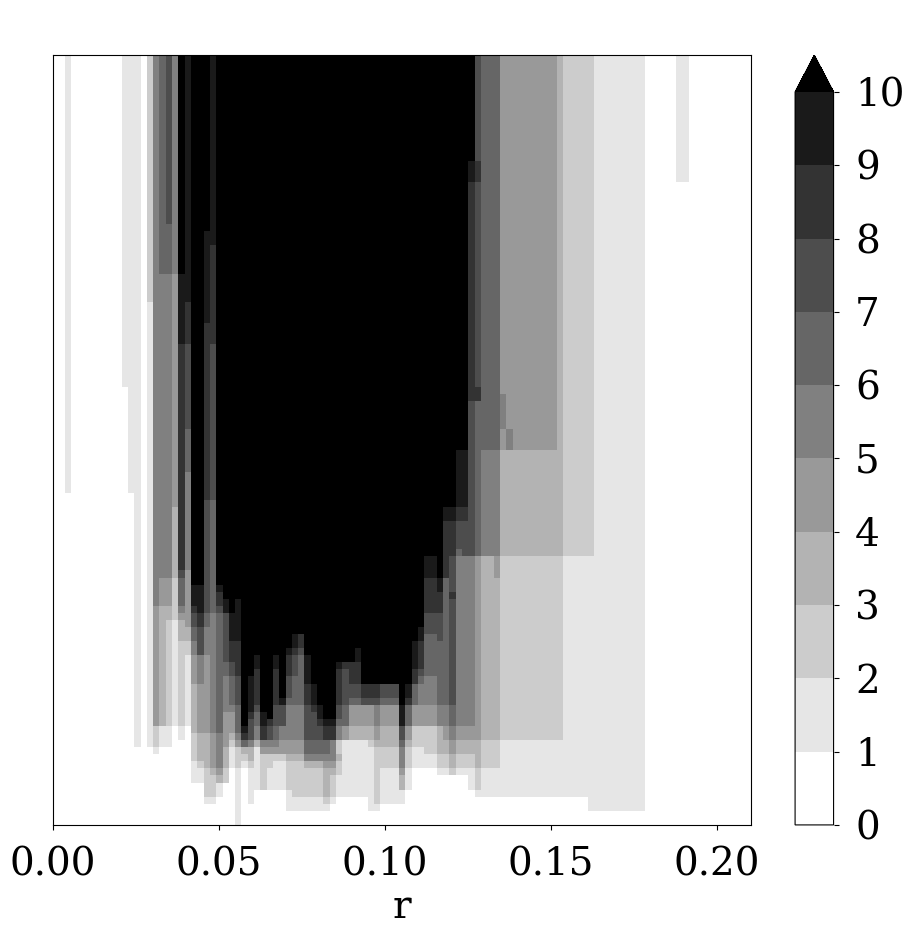

<Figure size 1000x1000 with 0 Axes>

In [12]:
t_start = time()
function_delaunay = mps.from_function_delaunay(X3, -density)
t_end = time()
print(f"Constructing the function Delaunay bifiltration took {t_end - t_start:.4f} seconds.")

for degree in [0, 1]:
    minimal_presentation = mps.minimal_presentation(function_delaunay, degree=degree)
    pers = mp.module_approximation(minimal_presentation, direction=[1, 0], swap_box_coords=[1])
    plot_module_approximation(pers, degree, adjust_y_axis=False, y_axis_label="log-codensity")
    savefig(f"function_delaunay_uniform_noise_codensity_h{degree}_persistence.eps")
    plot_hilbert_function(minimal_presentation, degree, adjust_y_axis=False, y_axis_label="log-codensity")
    savefig(f"function_delaunay_uniform_noise_codensity_h{degree}_hilbert_function.eps")


## Three Annulus Dataset

Saved figure to figs/function_delaunay_three_annulus_codensity.eps.


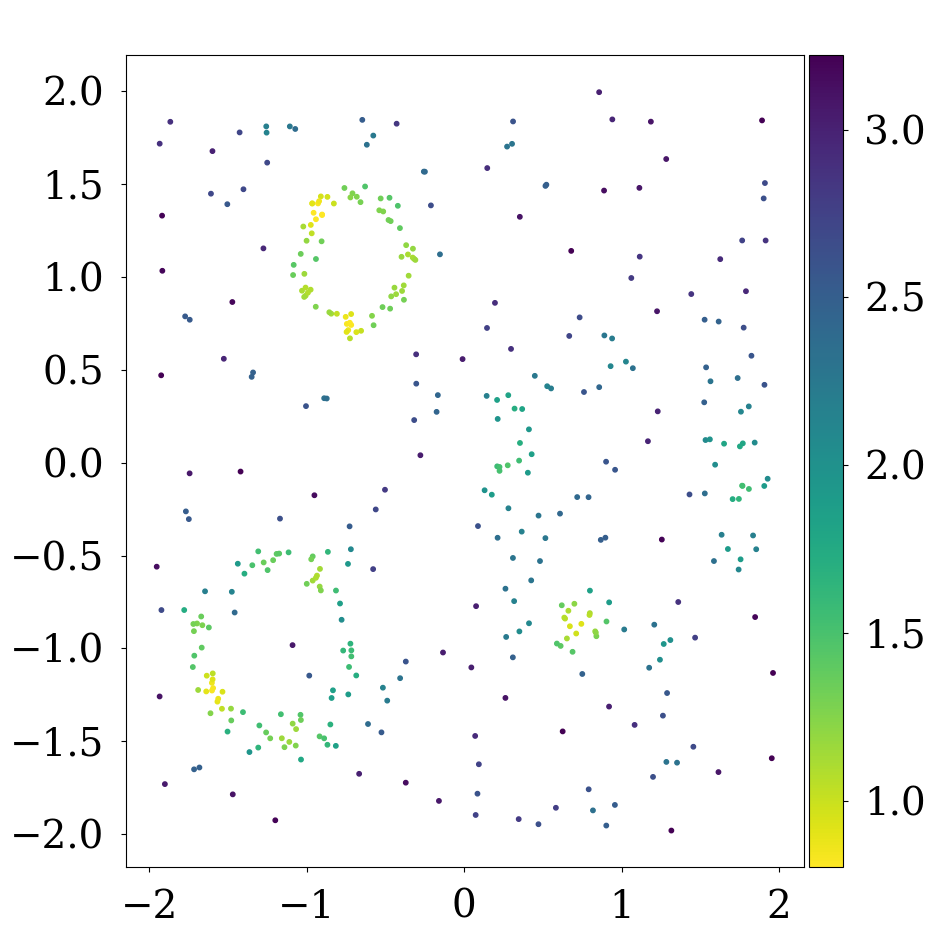

<Figure size 1000x1000 with 0 Axes>

In [13]:
density = KDE(bandwidth=0.10, return_log=True).fit(X4).score_samples(X4)
sc = plt.scatter(*X4.T, c = -density, cmap="viridis_r", s=10)
divider = make_axes_locatable(sc.axes)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(sc, cax=cax)
savefig("function_delaunay_three_annulus_codensity.eps")

Constructing the function Delaunay bifiltration took 0.0799 seconds.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved figure to figs/function_delaunay_three_annulus_codensity_h1_persistence.eps.


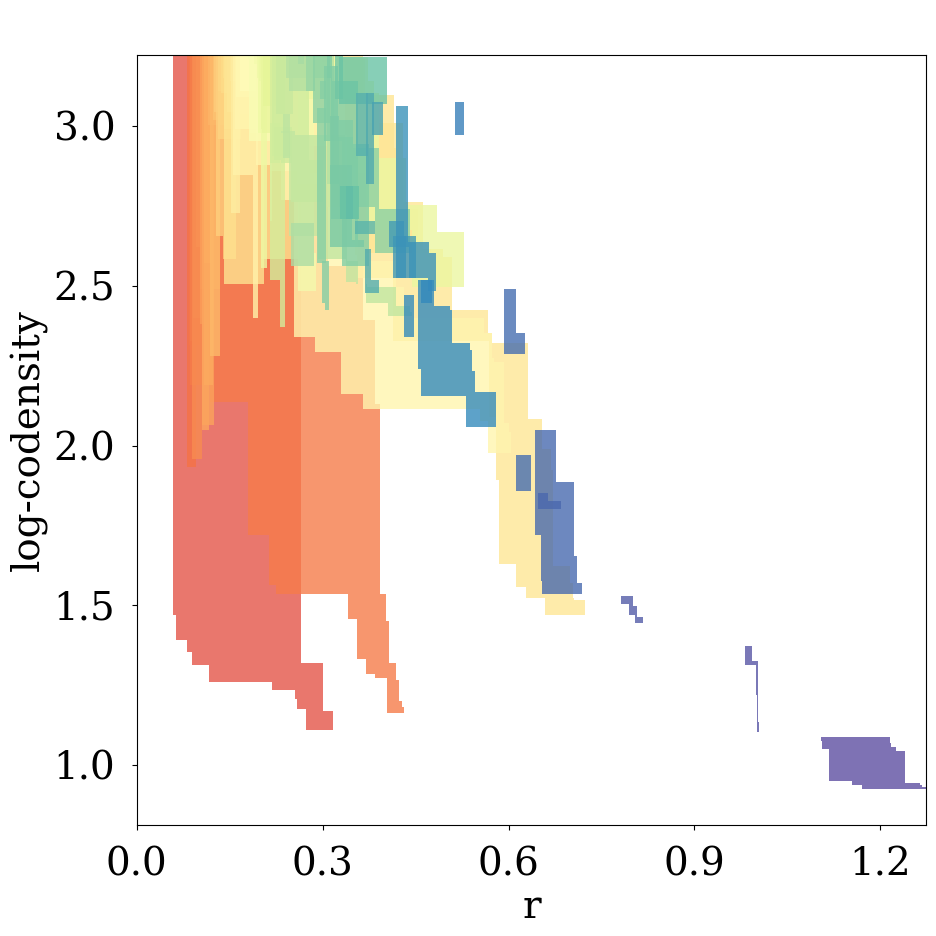

Computing the Hilbert function for degree 1...
Computing the Hilbert function took 0.0846 seconds.
Saved figure to figs/function_delaunay_three_annulus_codensity_h1_hilbert_function.eps.


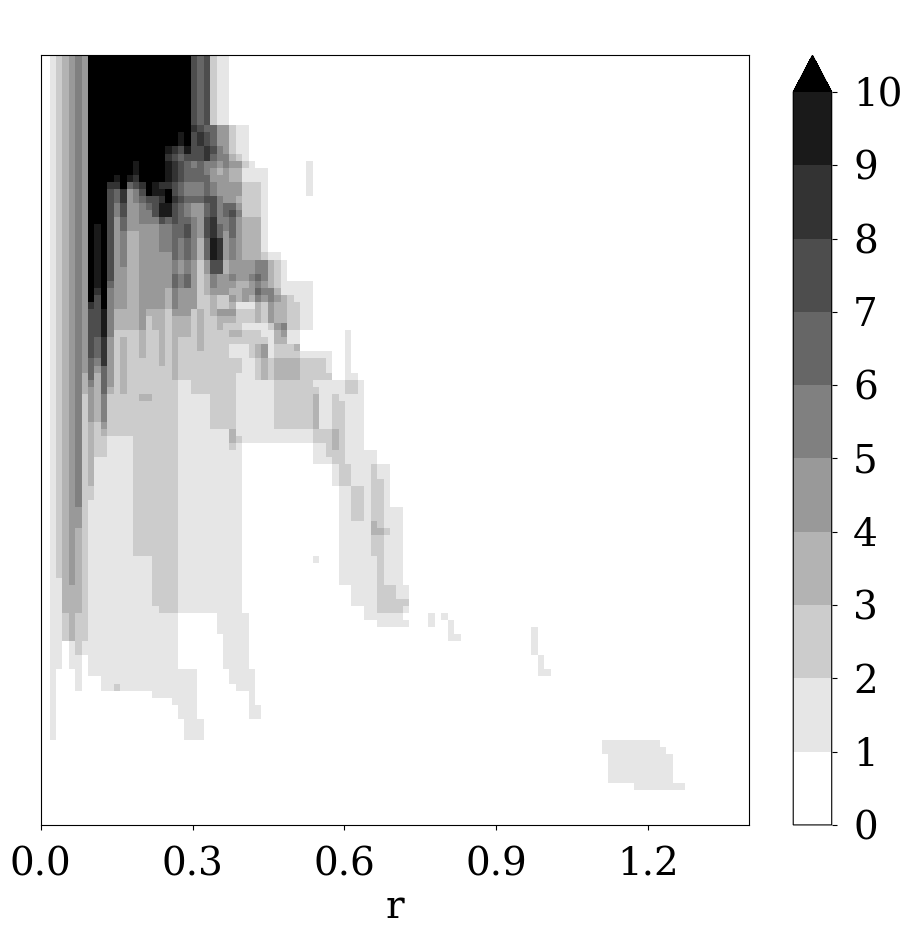

<Figure size 1000x1000 with 0 Axes>

In [14]:
t_start = time()
function_delaunay = mps.from_function_delaunay(X4, -density)
t_end = time()
print(f"Constructing the function Delaunay bifiltration took {t_end - t_start:.4f} seconds.")

for degree in [1]:
    minimal_presentation = mps.minimal_presentation(function_delaunay, degree=degree)
    pers = mp.module_approximation(minimal_presentation, direction=[1, 0], swap_box_coords=[1])
    plot_module_approximation(pers, degree, adjust_y_axis=False, y_axis_label="log-codensity")
    savefig(f"function_delaunay_three_annulus_codensity_h{degree}_persistence.eps")
    plot_hilbert_function(minimal_presentation, degree, adjust_y_axis=False, y_axis_label="log-codensity")
    savefig(f"function_delaunay_three_annulus_codensity_h{degree}_hilbert_function.eps")


## Clusterable Dataset

Saved figure to figs/function_delaunay_clusterdata_codensity.eps.


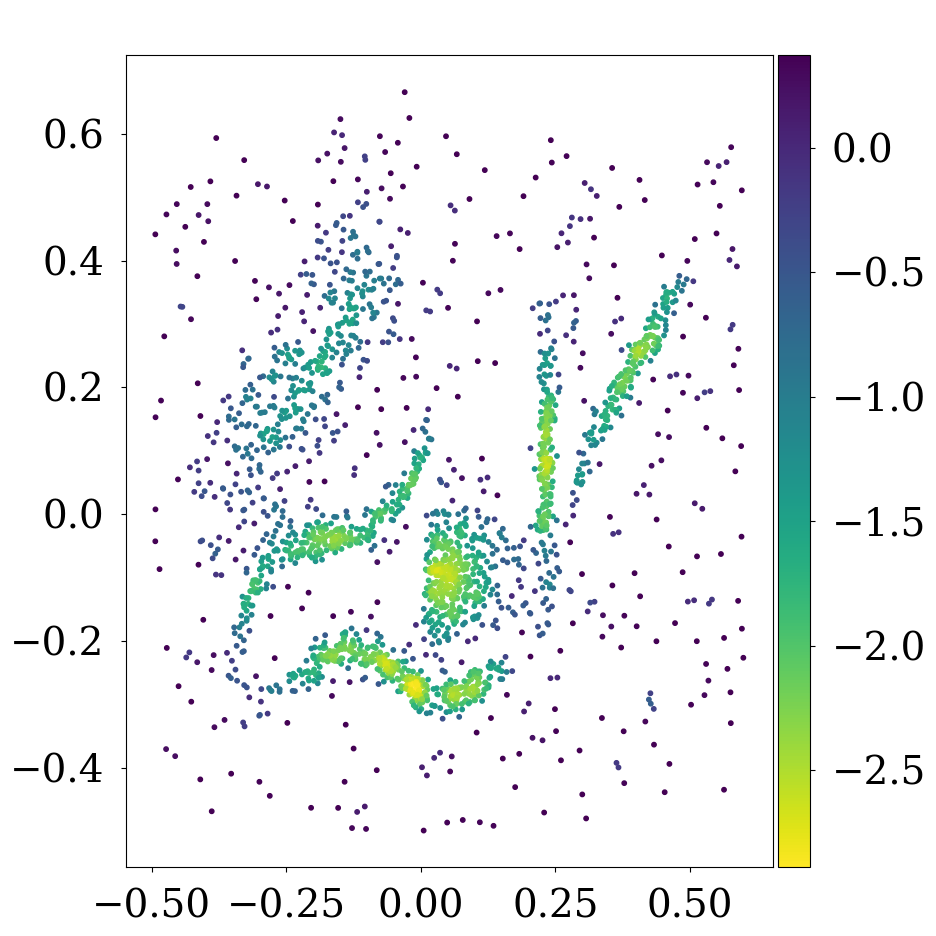

<Figure size 1000x1000 with 0 Axes>

In [15]:
density = KDE(bandwidth=0.01, return_log=True).fit(X2).score_samples(X2)
sc = plt.scatter(*X2.T, c = -density, cmap="viridis_r", s=10)
divider = make_axes_locatable(sc.axes)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(sc, cax=cax)
savefig("function_delaunay_clusterdata_codensity.eps")

Constructing the function Delaunay bifiltration took 0.5509 seconds.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved figure to figs/function_delaunay_clusterdata_codensity_h0_persistence.eps.


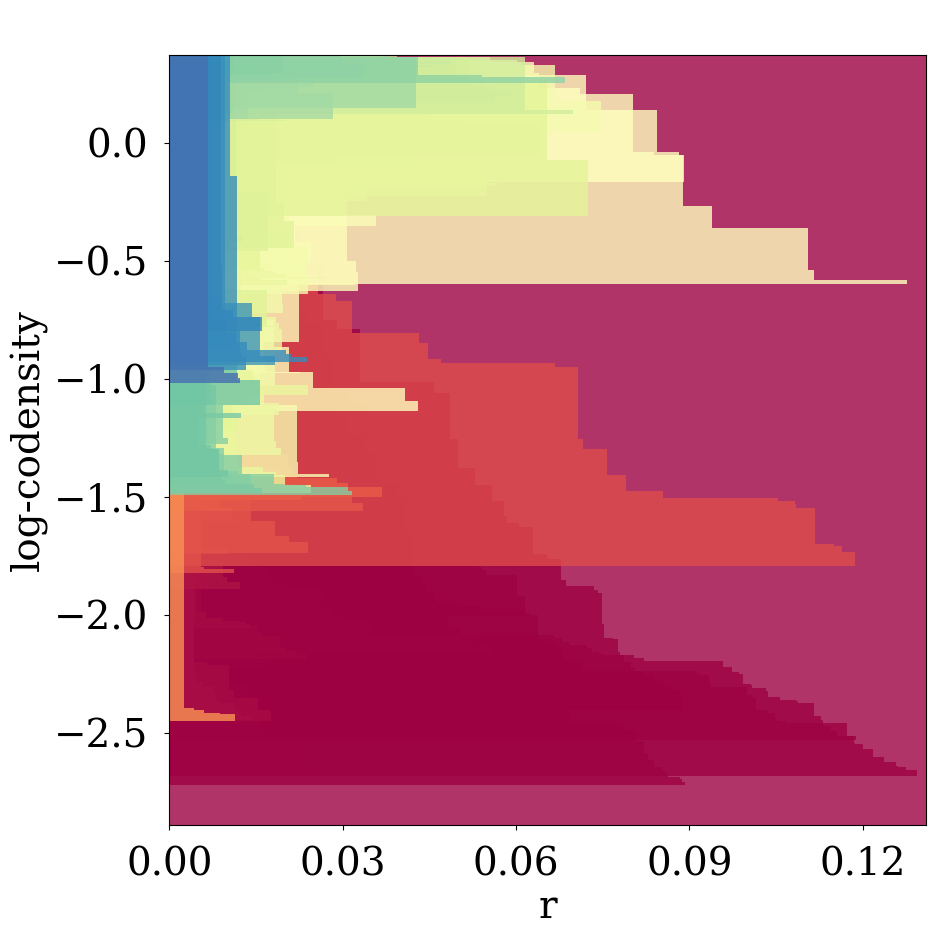

Computing the Hilbert function for degree 0...
Computing the Hilbert function took 0.2191 seconds.
Saved figure to figs/function_delaunay_clusterdata_codensity_h0_hilbert_function.eps.


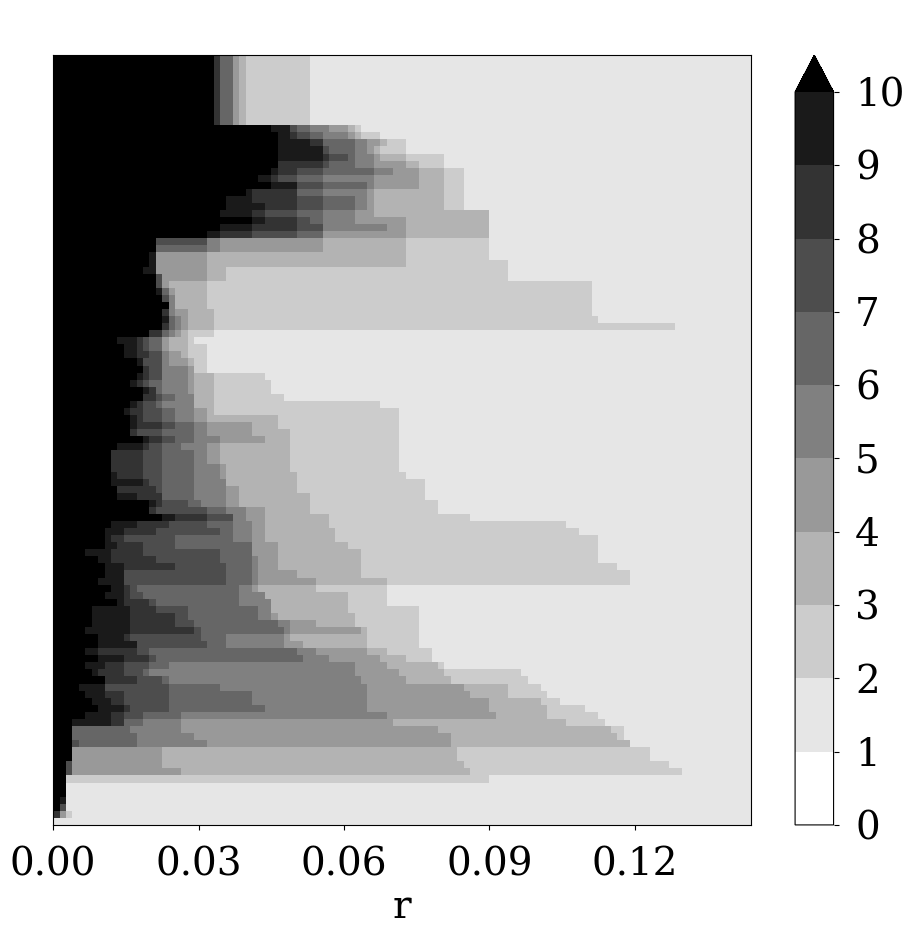

<Figure size 1000x1000 with 0 Axes>

In [16]:
t_start = time()
function_delaunay = mps.from_function_delaunay(X2, -density)
t_end = time()
print(f"Constructing the function Delaunay bifiltration took {t_end - t_start:.4f} seconds.")

for degree in [0]:
    minimal_presentation = mps.minimal_presentation(function_delaunay, degree=degree)
    pers = mp.module_approximation(minimal_presentation, direction=[1, 0], swap_box_coords=[1])
    plot_module_approximation(pers, degree, adjust_y_axis=False, y_axis_label="log-codensity")
    savefig(f"function_delaunay_clusterdata_codensity_h{degree}_persistence.eps")
    plot_hilbert_function(minimal_presentation, degree, adjust_y_axis=False, y_axis_label="log-codensity")
    savefig(f"function_delaunay_clusterdata_codensity_h{degree}_hilbert_function.eps")
